# DataCamp - Introduction to Regression with statsmodels in Python

In [203]:
#Regression - a statistical tool to analyze the relationships between response variable and some explanatory variables. 
#That is, given some explanatory variables, you can make predictions about the value of the response variable. 

#The response variable, the one you want to make predictions on, is also known as the dependent variable or the y variable. 
#These two terms are completely interchangeable. 
#Explanatory variables, used to explain how the predictions will change, are also known as independent variables or x variables. 
#Again, these terms are interchangeable.

#Linear regression is used when the response variable is numeric. 
#Logistic regression is used when the response variable is logical - True or False

In [204]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [205]:
#To run a linear regression model. 
#OLS stands for ordinary least squares, which is a type of regression, and is commonly used.
from statsmodels.formula.api import ols

In [206]:
#To draw a Q-Q plot, you can use the qqplot function from the statsmodels package.
from statsmodels.api import qqplot

In [300]:
#To run a logistic regression
from statsmodels.formula.api import logit

In [350]:
#The mosaic function from the statsmodels package lets you easily plot the confusion matrix
from statsmodels.graphics.mosaicplot import mosaic

## Numeric Explanatory Variable 

In [207]:
re_df = pd.read_csv('/Users/priyachaudhuri/Desktop/SSB TERM 1/Artificial intelligence/taiwan_real_estate2.csv')
re_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dist_to_mrt_m    414 non-null    float64
 1   n_convenience    414 non-null    int64  
 2   house_age_years  414 non-null    object 
 3   price_twd_msq    414 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.1+ KB


In [208]:
#Correlation
print(re_df['n_convenience'].corr(re_df['price_twd_msq']))

#Output means that as the number of convenience stores increases, the total amount typically increases as well.

0.5710049111111482


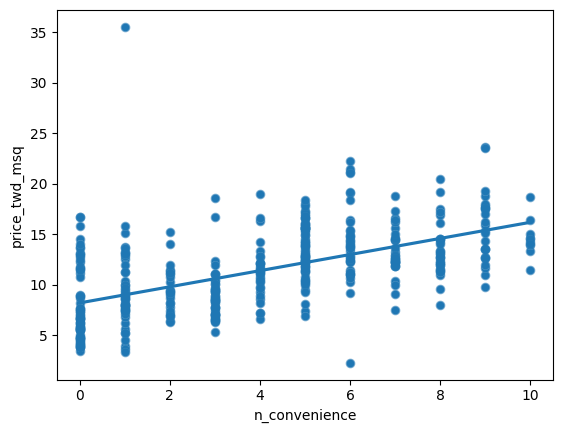

In [209]:
#Before you start running regression models, it's a good idea to visualize your dataset.
sns.scatterplot( x = 'n_convenience',
                y = 'price_twd_msq',
                data = re_df)

#A trend line means fitting a line that follows the data points. 
#In seaborn, trend lines are drawn using the regplot() function, which adds a trend line calculated using linear regression. 
#By default, regplot() adds a confidence interval around the line, which we can remove by setting the ci argument to None. 
#The trend line is mostly quite close to the data points, so we can say that the linear regression is a reasonable fit.

sns.regplot(x='n_convenience',
         y='price_twd_msq',
         data=re_df,
         ci=None,
         scatter_kws={'alpha': 0.5})

plt.show()

In [210]:
#Straight lines are completely defined by two properties. 
#The intercept is the y value when x is zero. 
#The slope is the steepness of the line, equal to the amount y increases if you increase x by one. 
# y = intercept +  slope  *  x 

In [211]:
# price_twd_msq - response variable
# n_convenience - explanatory variable

mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", 
                            data = re_df)
mdl_price_vs_conv = mdl_price_vs_conv.fit()
print(mdl_price_vs_conv.params)

#Output will be 2 coefficients - intercept and slope of the straight line
#On average, a house with zero convenience stores nearby had a price of 8.2242 TWD per square meter.
#If you increase the number of nearby convenience stores by one, then the expected increase in house price is 0.7981 TWD per square meter

Intercept        8.224237
n_convenience    0.798080
dtype: float64


## Categorical Explanatory Variable

In [212]:
fish_df = pd.read_csv('/Users/priyachaudhuri/Desktop/SSB TERM 1/Artificial intelligence/fish.csv')
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    128 non-null    object 
 1   mass_g     128 non-null    float64
 2   length_cm  128 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


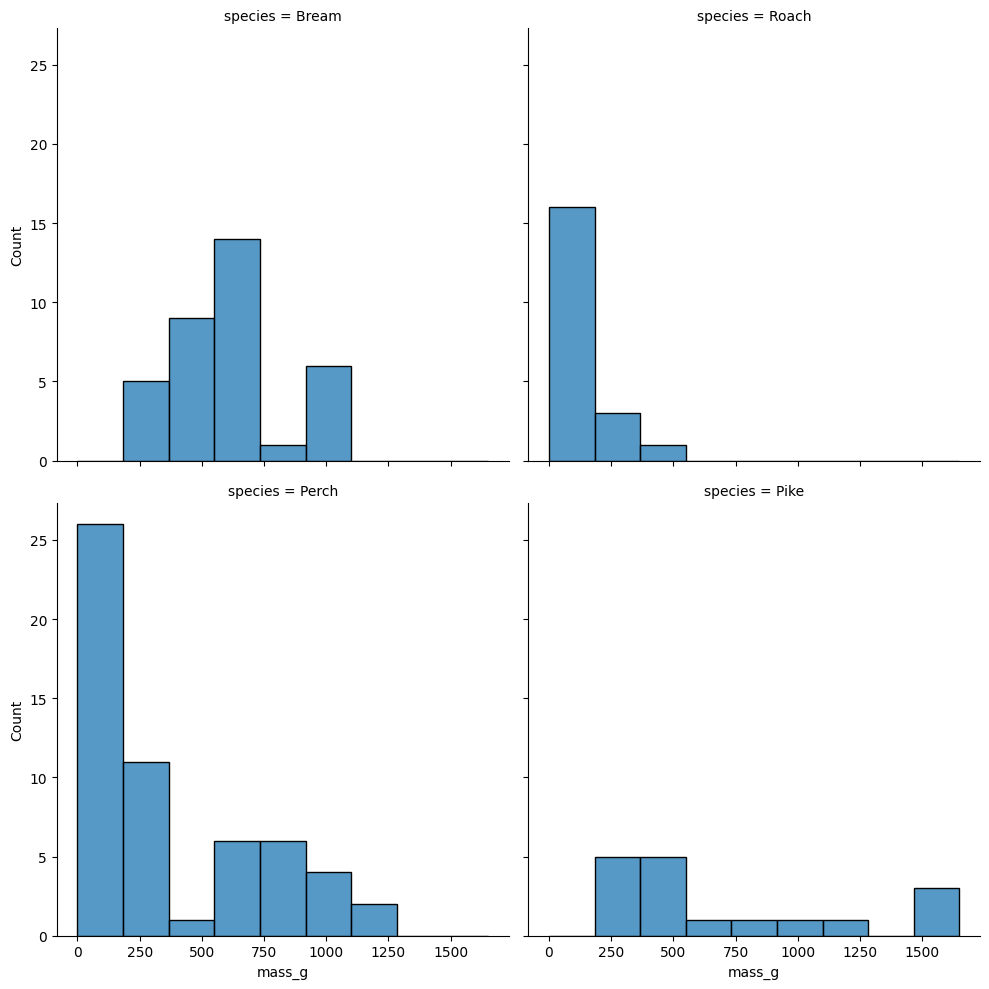

In [213]:
#To visualize the data, scatter plots aren't ideal because species is categorical. Instead, we can draw a histogram for each of the species.
#Displots takes an optional col_wrap argument to specify the number of plots per row. 
#By default, displot creates histograms.
sns.displot(data = fish_df, x = 'mass_g', 
            col = 'species', 
            col_wrap = 2, 
            bins = 9)
plt.show()

In [214]:
#Summary Statistics
summary_stats = fish_df.groupby('species')['mass_g'].mean()
print(summary_stats)

species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64


In [215]:
#mass_g - response variable
#species - explanatory variable
mdl_species_vs_mass = ols("mass_g ~ species", data = fish_df).fit()
print(mdl_species_vs_mass.params)

#4 coefficients: an intercept, and one for three of the fish species
#A coefficient for bream is missing, but the number for the intercept looks familiar. 
#The intercept is the mean mass of the bream that you just calculated.
#Why negative? - The coefficients for each category are calculated relative to the intercept. 
#This way of displaying results can be useful for models with multiple explanatory variables

#617.83 - 235.59 = 382.24 ---> mean mass of perch calculated earlier
#617.82 + 100 = 515.82 ---> mean mass of pike calculated earlier

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64


In [216]:
mdl_species_vs_mass = ols("mass_g ~ species + 0", 
                            data = fish_df).fit()
print(mdl_species_vs_mass.params)

#By changing the formula slightly to append "plus zero", we specify that all the coefficients should be given relative to zero.
#Equivalently, it means we are fitting a linear regression without an intercept term.
#coefficients are the mean now 

species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64


## Exercise

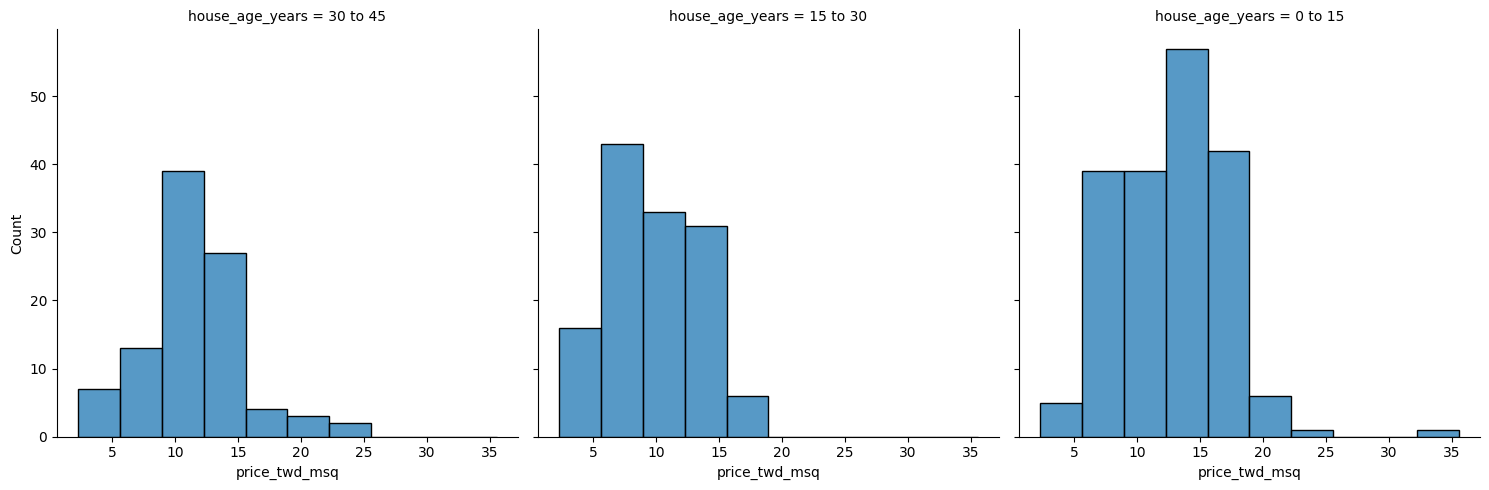

In [217]:
#Visualizing numeric vs. categorical
#Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=re_df,
         x='price_twd_msq',
         col='house_age_years',
         bins=10)

# Show the plot
plt.show()

In [218]:
#Calculating means by category
#Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = re_df.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [219]:
#Linear regression with a categorical explanatory variable
#Create the model, fit it
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years ", data=re_df).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [220]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=re_df).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


## Making predictions


In [221]:
#Only data for bream
bream = fish_df[fish_df['species']== 'Bream']
print(bream.head())

#There's a new explanatory variable too: the length of each fish -- used to predict the mass of the fish.

  species  mass_g  length_cm
0   Bream   242.0       23.2
1   Bream   290.0       24.0
2   Bream   340.0       23.9
3   Bream   363.0       26.3
4   Bream   430.0       26.5


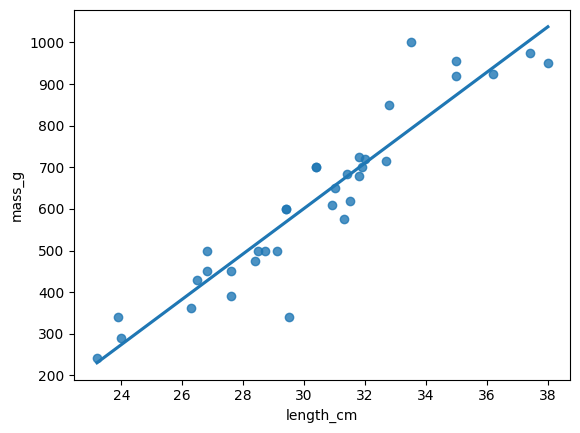

In [222]:
sns.regplot(x = "length_cm", 
            y = "mass_g",
            data = bream,
            ci = None)
plt.show()

In [223]:
mdl_mass_vs_length = ols("mass_g ~ length_cm", data = bream).fit()
print(mdl_mass_vs_length.params)

Intercept   -1035.347565
length_cm      54.549981
dtype: float64


In [224]:
#Principle behind predicting -- if I set the explanatory variables to these values, what value would the response variable have?
#To create new explanatory data, we need to store our explanatory variables of choice in a pandas DataFrame. 
explanatory_data = pd.DataFrame({"length_cm": np.arange(20,41)})
print(mdl_mass_vs_length.predict(explanatory_data))

#The predict function returns a Series of predictions, one for each row of the explanatory data.

0       55.652054
1      110.202035
2      164.752015
3      219.301996
4      273.851977
5      328.401958
6      382.951939
7      437.501920
8      492.051901
9      546.601882
10     601.151863
11     655.701844
12     710.251825
13     764.801806
14     819.351787
15     873.901768
16     928.451749
17     983.001730
18    1037.551710
19    1092.101691
20    1146.651672
dtype: float64


In [225]:
#Having a single column of predictions isn't that helpful to work with. 
#It's easier to work with if the predictions are in a DataFrame alongside the explanatory variables. 
#assign returns a new object with all original columns in addition to new ones.
prediction_data = explanatory_data.assign(
    mass_g = mdl_mass_vs_length.predict(explanatory_data))
print(prediction_data)

    length_cm       mass_g
0          20    55.652054
1          21   110.202035
2          22   164.752015
3          23   219.301996
4          24   273.851977
5          25   328.401958
6          26   382.951939
7          27   437.501920
8          28   492.051901
9          29   546.601882
10         30   601.151863
11         31   655.701844
12         32   710.251825
13         33   764.801806
14         34   819.351787
15         35   873.901768
16         36   928.451749
17         37   983.001730
18         38  1037.551710
19         39  1092.101691
20         40  1146.651672


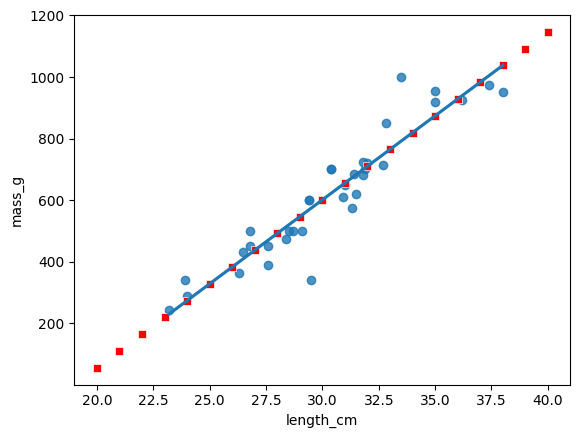

In [226]:
#To plot multiple layers, we set a matplotlib figure object called fig before calling regplot and scatterplot. 
#As a result, the plt.show() call will then plot both graphs on the same figure. 
#mark the prediction points in red squares to distinguish them from the actual data points. 
#Notice that the predictions lie exactly on the trend line.

fig = plt.figure()
sns.regplot(x="length_cm",
            y="mass_g",
            ci = None,
            data = bream)

sns.scatterplot(x="length_cm",
            y="mass_g",
            color = "red",
            marker = "s",
            data = prediction_data)
plt.show()

In [227]:
#All the fish were between twenty three and thirty eight centimeters, but the linear model allows us to make predictions outside that range. 
#This is called extrapolating. 
#Prediction for 10cm bream
little_bream = pd.DataFrame({"length_cm": [10]})
pred_little_bream = little_bream.assign(
    mass_g = mdl_mass_vs_length.predict(little_bream))
print(pred_little_bream)

#Output is sometimes misleading or rediculous

   length_cm      mass_g
0         10 -489.847756


## Exercise

In [228]:
# Create the explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})
# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)
# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)
# Print the result
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


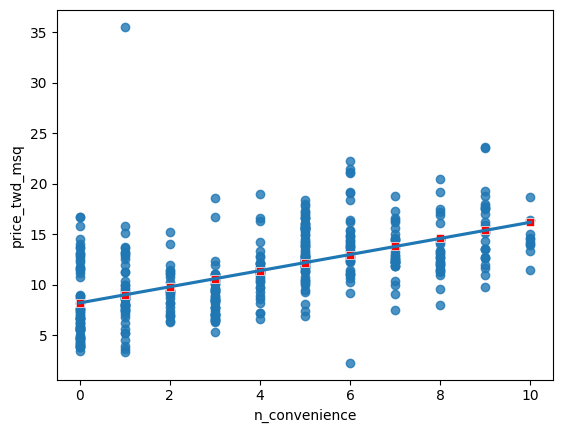

In [229]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=re_df,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
            y="price_twd_msq",
            data=prediction_data,
            color ="red",
            marker="s")

# Show the layered plot
plt.show()

In [230]:
# Define a DataFrame impossible
impossible = pd.DataFrame({"n_convenience": [-1,2.5]})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(impossible)
# Create prediction_data
prediction_data_ex = impossible.assign(
    price_twd_msq = price_twd_msq)
# Print the result
print(prediction_data_ex)

#The model successfully gives a prediction about cases that are impossible in real life.

   n_convenience  price_twd_msq
0           -1.0       7.426158
1            2.5      10.219437


## Working with model objects

In [231]:
#Fitted values is jargon for predictions on the original dataset used to create the model. 
#Access them with the fittedvalues attribute. 
#The result is a pandas Series of length thirty five, which is the number of rows in the bream dataset. 
#The fittedvalues attribute is essentially a shortcut for taking the explanatory variable 
#columns from the dataset, then feeding them to the predict function

print(mdl_mass_vs_length.fittedvalues)

0      230.211993
1      273.851977
2      268.396979
3      399.316934
4      410.226930
5      426.591924
6      426.591924
7      470.231909
8      470.231909
9      519.326892
10     513.871893
11     530.236888
12     552.056880
13     573.876873
14     568.421874
15     568.421874
16     622.971855
17     622.971855
18     650.246846
19     655.701844
20     672.066838
21     677.521836
22     682.976834
23     699.341829
24     704.796827
25     699.341829
26     710.251825
27     748.436811
28     753.891810
29     792.076796
30     873.901768
31     873.901768
32     939.361745
33    1004.821722
34    1037.551710
dtype: float64


In [232]:
#equivalent to fitted values
#The fittedvalues attribute is essentially a shortcut for taking the explanatory variable columns from the dataset, then feeding them to the predict function.

explanatory_data = bream['length_cm']
print(mdl_mass_vs_length.predict(explanatory_data))

0      230.211993
1      273.851977
2      268.396979
3      399.316934
4      410.226930
5      426.591924
6      426.591924
7      470.231909
8      470.231909
9      519.326892
10     513.871893
11     530.236888
12     552.056880
13     573.876873
14     568.421874
15     568.421874
16     622.971855
17     622.971855
18     650.246846
19     655.701844
20     672.066838
21     677.521836
22     682.976834
23     699.341829
24     704.796827
25     699.341829
26     710.251825
27     748.436811
28     753.891810
29     792.076796
30     873.901768
31     873.901768
32     939.361745
33    1004.821722
34    1037.551710
dtype: float64


In [233]:
#Residuals" are a measure of inaccuracy in the model fit, and are accessed with the resid attribute. 
print(mdl_mass_vs_length.resid)

0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64


In [234]:
#equivalent of resid
#Each residual = actual response value -  predicted response value.
#In this case, the residuals are the masses of breams, minus the fitted values.
print(bream['mass_g'] - mdl_mass_vs_length.fittedvalues)

#There are two possibilities for why you have a residual. 
#Firstly, it could just be because your model isn't great.

0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64


In [235]:
print(mdl_mass_vs_length.summary())

#you see the dependent variable(s) that were used in the model, in addition to the type of regression. 
#You also see some metrics on the performance of the model.
#In the second part of the summary, you see details of the coefficients. 
#The numbers in the first column are the ones contained in the params attribute. 
#The numbers in the fourth column are the p-values, which refer to statistical significance. 
#The last part of the summary are diagnostic statistics


                            OLS Regression Results                            
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.22e-16
Time:                        23:30:08   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.0

## Exercise

In [236]:
#Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

#Get the intercept
intercept = coeffs[0]

#Get the slope
slope = coeffs[1]

#Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

#Compare to the results from .predict()
#print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

0     26.739687
1     27.378151
2     27.298343
3     29.213734
4     29.373350
5     29.612774
6     29.612774
7     30.251238
8     30.251238
9     30.969509
10    30.889701
11    31.129125
12    31.448357
13    31.767589
14    31.687781
15    31.687781
16    32.485861
17    32.485861
18    32.884901
19    32.964709
20    33.204133
21    33.283941
22    33.363749
23    33.603172
24    33.682980
25    33.603172
26    33.762788
27    34.321444
28    34.401252
29    34.959908
30    36.157028
31    36.157028
32    37.114723
33    38.072419
34    38.551267
Name: length_cm, dtype: float64


/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_31575/2175118258.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = coeffs[0]
/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_31575/2175118258.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = coeffs[1]


## Regression to the mean

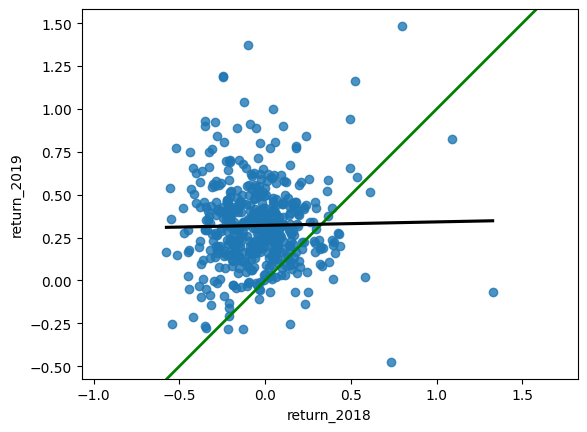

In [237]:
#Regression to the mean is a property of the data, not a type of model, but linear regression can be used to quantify its effect.
## response value = fitted value (equal to the sum of a fitted value, that is, the prediction by the model) + residual
#Particularly in the case of simple linear regression where you only have one explanatory variable, there is often room for improvement. 
#However, it usually isn't possible or desirable to have a perfect model because the world contains a lot of randomness, and your model shouldn't capture that. 
#In particular, extreme responses are often due to randomness or luck. That means that extremes don't persist over time, because eventually the luck runs out. 
#This is the concept of regression to the mean. Eventually, extreme cases will look more like average cases

portfolio_df = pd.read_csv('/Users/priyachaudhuri/Desktop/SSB TERM 1/Artificial intelligence/sp500_yearly_returns.csv')

# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x = "return_2018", y = 'return_2019', ci = None, data = portfolio_df, line_kws = {"color":"black"})

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

# Show the plot
plt.show()

In [238]:
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols("return_2019 ~ return_2018",
data = portfolio_df).fit()

# Print the parameters
print(mdl_returns.params)

Intercept      0.321321
return_2018    0.020069
dtype: float64


In [239]:
mdl_returns = ols("return_2019 ~ return_2018", data=portfolio_df).fit()

# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({"return_2018": [-1,0,1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

0    0.301251
1    0.321321
2    0.341390
dtype: float64


## Transforming Variables

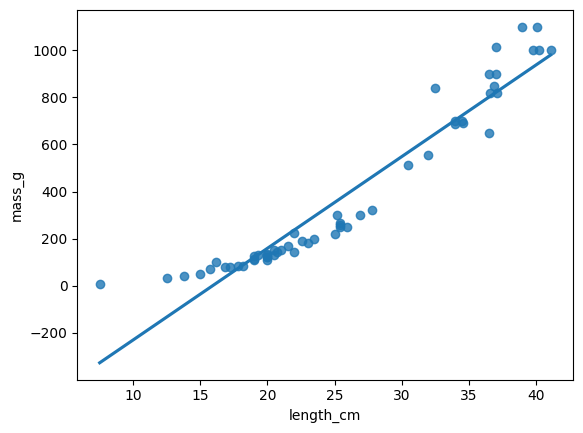

In [240]:
perch = fish_df[fish_df['species']== 'Perch']
sns.regplot(x="length_cm",
            y="mass_g",
            ci = None,
            data = perch)
plt.show()

#Bream had a more linear relationship - as bream get bigger, they mostly get longer and not wider. 
#perch has a round body, so  as it grows, it gets fatter and taller as well as longer. 
#Since the perches are growing in three directions at once, maybe the length cubed will give a better fit.

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_31575/302019338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perch["length_cm_cubed"] = perch["length_cm"] ** 3


<Axes: xlabel='length_cm_cubed', ylabel='mass_g'>

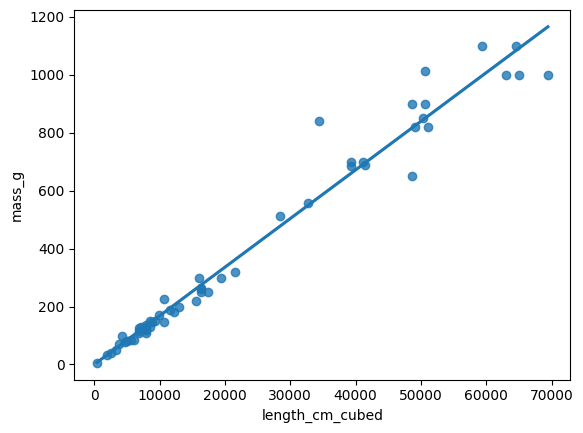

In [241]:
perch["length_cm_cubed"] = perch["length_cm"] ** 3
sns.regplot(x="length_cm_cubed",
            y="mass_g",
            ci = None,
            data = perch)

#data points fit the points much better now so we can run a model

In [242]:
mdl_perch = ols("mass_g ~ length_cm_cubed", data = perch).fit()
print(mdl_perch.params)

Intercept         -0.117478
length_cm_cubed    0.016796
dtype: float64


In [243]:
explanatory_data = pd.DataFrame({"length_cm_cubed": np.arange(10,41,5) ** 3,"length_cm": np.arange(10,41,5)})
prediction_data = explanatory_data.assign(
    mass_g = mdl_perch.predict(explanatory_data))
print(prediction_data)

   length_cm_cubed  length_cm       mass_g
0             1000         10    16.678135
1             3375         15    56.567717
2             8000         20   134.247429
3            15625         25   262.313982
4            27000         30   453.364084
5            42875         35   719.994447
6            64000         40  1074.801781


<Axes: xlabel='length_cm_cubed', ylabel='mass_g'>

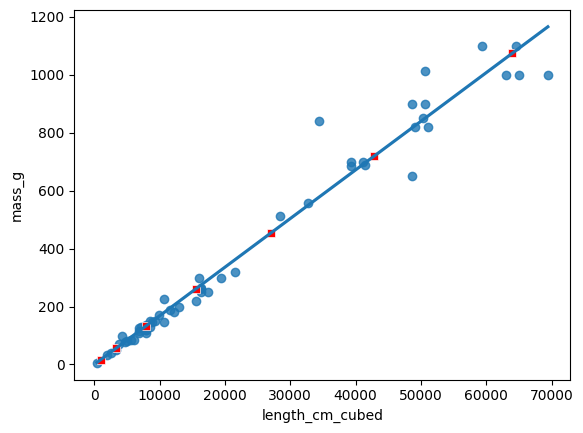

In [244]:
fig = plt.figure()

sns.regplot(x="length_cm_cubed",
            y="mass_g",
            ci = None,
            data = perch)

sns.scatterplot(x="length_cm_cubed",
            y="mass_g",
            color = "red",
            marker = "s",
            data = prediction_data)

#the predictions follow the line drawn by regplot.

<Axes: xlabel='length_cm', ylabel='mass_g'>

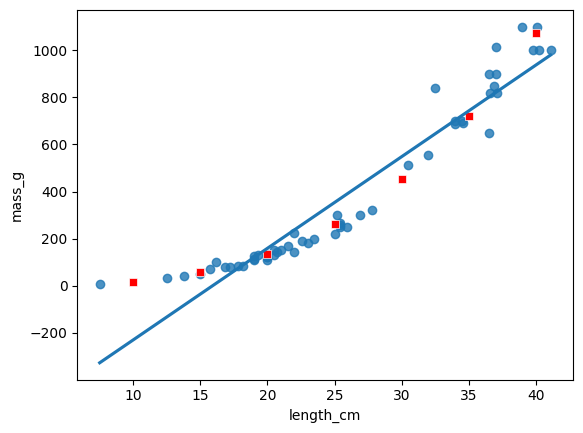

In [245]:
fig = plt.figure()

sns.regplot(x="length_cm",
            y="mass_g",
            ci = None,
            data = perch)

sns.scatterplot(x="length_cm",
            y="mass_g",
            color = "red",
            marker = "s",
            data = prediction_data)

#red points curve upwards to follow the data
#Your linear model has non-linear predictions, after the transformation is undone

In [246]:
ad_df = pd.read_csv('/Users/priyachaudhuri/Desktop/SSB TERM 1/Artificial intelligence/ad_conversion.csv')
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   spent_usd      936 non-null    float64
 1   n_impressions  936 non-null    int64  
 2   n_clicks       936 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 22.1 KB


<Axes: xlabel='spent_usd', ylabel='n_impressions'>

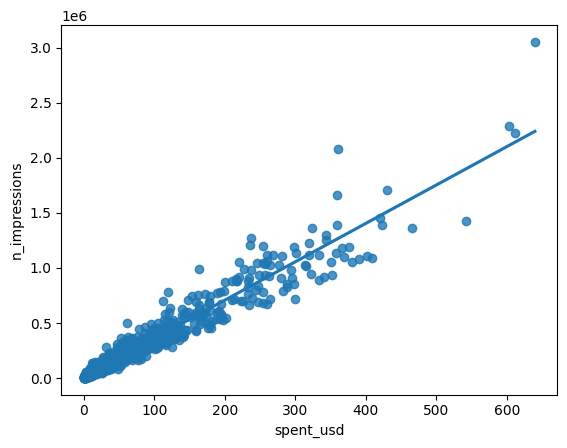

In [247]:
sns.regplot(x="spent_usd",
            y="n_impressions",
            ci = None,
            data = ad_df)

#the majority of the points are crammed into the bottom-left of the plot

<Axes: xlabel='sqrt_spent_usd', ylabel='sqrt_n_impressions'>

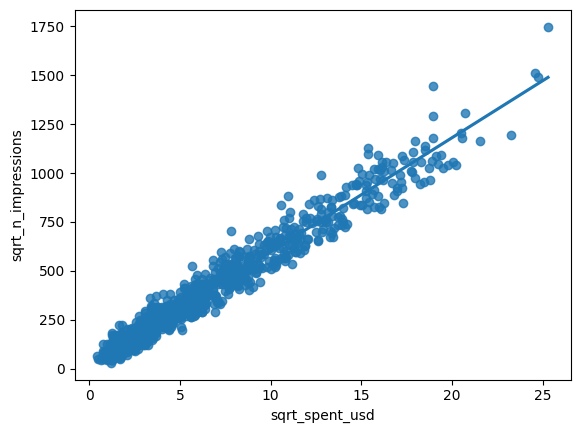

In [248]:
#Square roots are a common transformation when your data has a right-skewed distribution.
ad_df['sqrt_spent_usd'] = np.sqrt(ad_df['spent_usd'])
ad_df['sqrt_n_impressions'] = np.sqrt(ad_df['n_impressions'])

sns.regplot(x="sqrt_spent_usd",
            y="sqrt_n_impressions",
            ci = None,
            data = ad_df)

In [249]:
#Because we took the square root of the response variable (not just the explanatory variable), 
#the predict function will predict the square root of the number of impressions. 
#That means that we have to undo the square root by squaring the predicted responses. 
#Undoing the transformation of the response is called back transformation.

mdl_ad = ols("sqrt_n_impressions ~ sqrt_spent_usd", data = ad_df).fit()
explanatory_data = pd.DataFrame({"sqrt_spent_usd": np.sqrt(np.arange(0,601,100)), "spent_usd": np.arange(0,601,100)})
prediction_data = explanatory_data.assign(sqrt_n_impressions = mdl_ad.predict(explanatory_data), 
    n_impressions = mdl_ad.predict(explanatory_data)**2)

print(prediction_data)

   sqrt_spent_usd  spent_usd  sqrt_n_impressions  n_impressions
0        0.000000          0           15.319713   2.346936e+02
1       10.000000        100          597.736582   3.572890e+05
2       14.142136        200          838.981547   7.038900e+05
3       17.320508        300         1024.095320   1.048771e+06
4       20.000000        400         1180.153450   1.392762e+06
5       22.360680        500         1317.643422   1.736184e+06
6       24.494897        600         1441.943858   2.079202e+06


## Exercise

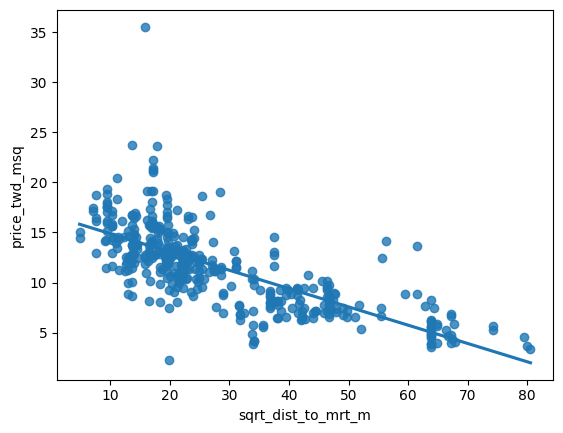

In [250]:
# Create sqrt_dist_to_mrt_m
re_df["sqrt_dist_to_mrt_m"] = np.sqrt(re_df["dist_to_mrt_m"])

plt.figure()

# Plot using the transformed variable
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq",
            ci = None,
            data = re_df)
plt.show()

In [251]:
# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq ~sqrt_dist_to_mrt_m", data = re_df).fit()

# Print the parameters
print(mdl_price_vs_dist.params)

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64


In [252]:
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


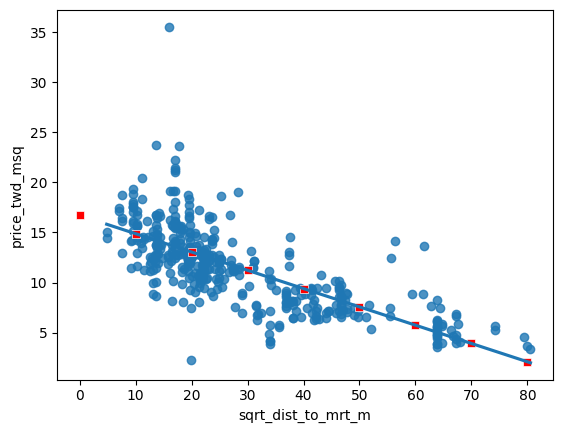

In [253]:
fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=re_df, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=prediction_data, marker="s", color="red")
plt.show()

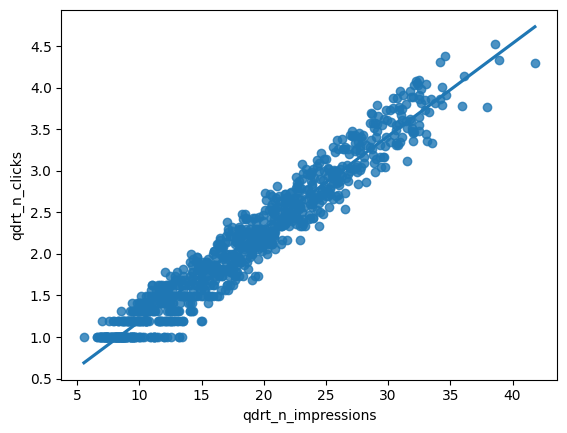

In [254]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_df["qdrt_n_impressions"] = ad_df["n_impressions"]**0.25
ad_df["qdrt_n_clicks"] = ad_df["n_clicks"]**.25

plt.figure()

# Plot using the transformed variables
sns.regplot(x = "qdrt_n_impressions",
y = "qdrt_n_clicks",
data = ad_df,
ci = None)
plt.show()

In [255]:
# Run a linear regression of your transformed variables
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data = ad_df).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data), 
    n_impressions = mdl_click_vs_impression.predict(explanatory_data)**.25
)

# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000       0.517550       0.071748
1           26.591479       1.320176       3.037576
2           31.622777       1.377328       3.598732
3           34.996355       1.411998       3.974998
4           37.606031       1.437166       4.266063
5           39.763536       1.457017       4.506696
6           41.617915       1.473453       4.713520


In [256]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000       0.517550       0.071748    0.000026
1           26.591479       1.320176       3.037576   85.135121
2           31.622777       1.377328       3.598732  167.725102
3           34.996355       1.411998       3.974998  249.659131
4           37.606031       1.437166       4.266063  331.214159
5           39.763536       1.457017       4.506696  412.508546
6           41.617915       1.473453       4.713520  493.607180


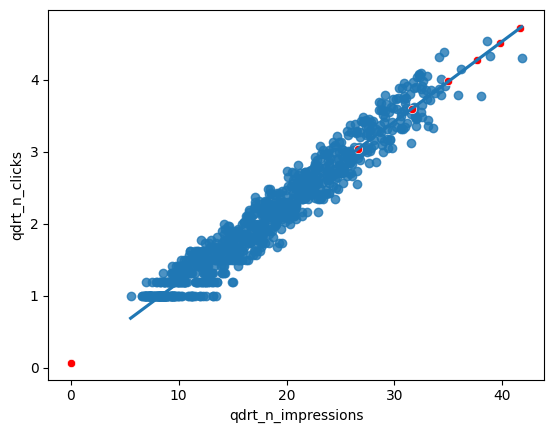

In [257]:
# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_df, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data = prediction_data, color="red")
plt.show()

## Quantifying model fit


In [258]:
#coefficient of determination - sometimes called "r-squared". 
#it's written with a lower case r for simple linear regression and an upper case R when you have more than one explanatory variable. 
#It is defined as the proportion of the variance in the response variable that is predictable from the explanatory variable.
#1 - perfect fit
#0 - your model is no better than randomness

In [259]:
mdl_bream = ols("mass_g ~ length_cm", data = bream).fit()
print(mdl_bream.summary())

                            OLS Regression Results                            
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.22e-16
Time:                        23:30:13   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.0

In [260]:
print(mdl_bream.rsquared)

0.8780627095147174


In [261]:
#For simple linear regression, the interpretation of the coefficient of determination is straightforward. 
#It is simply the correlation between the explanatory and response variables, squared.
coeff_determination = bream["length_cm"].corr(bream["mass_g"]) ** 2
print(coeff_determination)

0.8780627095147171


In [262]:
#Residual is the difference between a predicted value and an observed value. 
#RSE (Residual Std error)- a measure of the typical size of the residuals.
#how much the predictions are typically wrong. 
#It has the same unit as the response variable. In the fish models, the response unit is grams. 
#mean squared error MSE is the squared residual standard error.

mse = mdl_bream.mse_resid
print("mse: ", mse)

rse = np.sqrt(mse)
print("rse: ", rse)


mse:  5498.55508497352
rse:  74.15224261594197


In [263]:
#calculate rse "manually"

residuals_sq = mdl_bream.resid ** 2
resid_sum_sq = sum(residuals_sq)

#degree of freedom = number of observations -  number of model coefficients.
deg_freedom = len(bream.index) - 2

rse = np.sqrt(resid_sum_sq/deg_freedom)


print("residuals sq: ", residuals_sq)
print("resid sum of sq: ", resid_sum_sq)
print("degree of freedom: ", deg_freedom)
print("rse: ", rse)

#RSE = 74 -- difference between predicted bream masses and observed bream masses is typically about 74g.


residuals sq:  0       138.957118
1       260.758635
2      5126.992578
3      1318.919660
4       390.974309
5       547.938023
6      5388.745625
7      6437.159178
8       409.330131
9       373.528738
10     1511.024102
11      914.269381
12     2709.918769
13    54698.391492
14      997.178016
15      997.178016
16     5933.335069
17     5933.335069
18     1619.808598
19       32.511024
20     9421.971076
21       55.922933
22     3966.081668
23      374.106336
24       23.009547
25      658.341757
26       95.026919
27     1185.893986
28     9236.784264
29    43232.058660
30     2125.047026
31     6576.923291
32      206.259713
33      889.335096
34     7665.302003
dtype: float64
resid sum of sq:  181452.31780412616
degree of freedom:  33
rse:  74.15224261594197


In [264]:
#Root-mean-square error (RMSE)
residuals_sq = mdl_bream.resid ** 2
resid_sum_sq = sum(residuals_sq)

#here is the diff between rse and rmse
n_obs = len(bream.index)

rmse = np.sqrt(resid_sum_sq/n_obs)


print("residuals sq: ", residuals_sq)
print("resid sum of sq: ", resid_sum_sq)
print("no. of obs: ", n_obs)
print("rmse: ", rmse)

#worse for comparisons between models. You need to be aware that RMSE exists, but typically you should use RSE instead.


residuals sq:  0       138.957118
1       260.758635
2      5126.992578
3      1318.919660
4       390.974309
5       547.938023
6      5388.745625
7      6437.159178
8       409.330131
9       373.528738
10     1511.024102
11      914.269381
12     2709.918769
13    54698.391492
14      997.178016
15      997.178016
16     5933.335069
17     5933.335069
18     1619.808598
19       32.511024
20     9421.971076
21       55.922933
22     3966.081668
23      374.106336
24       23.009547
25      658.341757
26       95.026919
27     1185.893986
28     9236.784264
29    43232.058660
30     2125.047026
31     6576.923291
32      206.259713
33      889.335096
34     7665.302003
dtype: float64
resid sum of sq:  181452.31780412616
no. of obs:  35
rmse:  72.00244396727619


In [265]:
#mdl_click_vs_impression_orig has a coefficient of determination of 0.89. Which statement about the model is true?
#The number of impressions explains 89% of the variability in the number of clicks.

#mdl_click_vs_impression_orig has an RSE of about 20. Which statement is true?
#The typical difference between observed number of clicks and predicted number of clicks is 20.

## Visualizing model fit


Text(0, 0.5, 'Residuals')

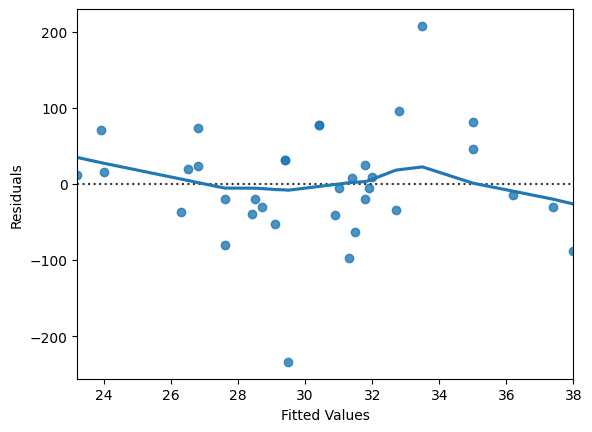

In [266]:
#The first diagnostic plot is of residuals versus fitted values. 
#The blue line is a LOWESS trend line, which is a smooth curve following the data. 
#These aren't good for making predictions but are useful for visualizing trends. 
#If residuals met the assumption that they are normally distributed with mean zero - the trend line should closely follow the y equals zero line on the plot.

sns.residplot(x ="length_cm", y = "mass_g", data = bream, lowess = True)
plt.xlabel("Fitted Values") 
plt.ylabel("Residuals")

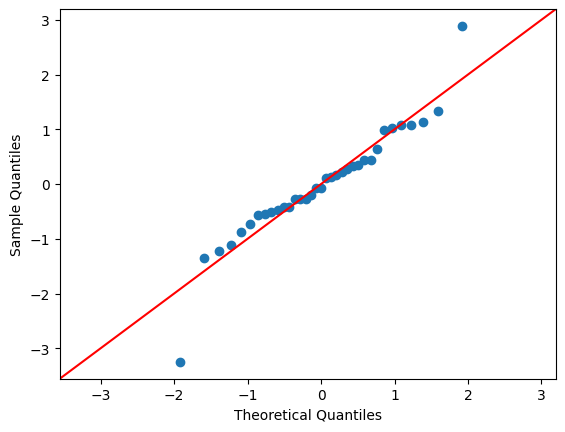

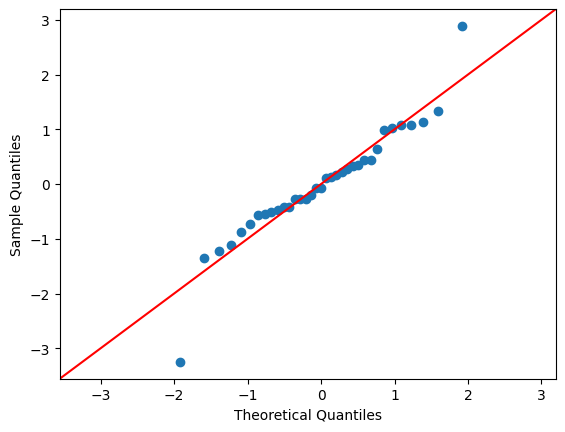

In [267]:
#Q-Q plot - It shows whether or not the residuals follow a normal distribution. 
#On the x-axis, the points are quantiles from the normal distribution. 
#On the y-axis, you get the sample quantiles, which are the quantiles derived from your dataset. 
#It sounds technical, but interpreting this plot is straightforward. 
#If the points track along the straight line, they are normally distributed. 
#If not, they aren't.

qqplot(data = mdl_bream.resid, fit = True, line ="45")

Text(0, 0.5, 'Sqrt of abs val of stdized residuals')

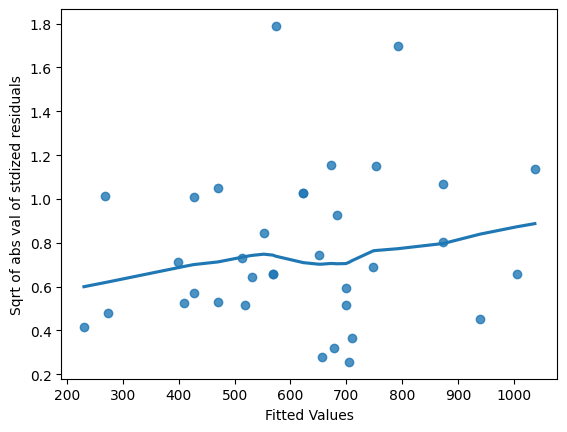

In [268]:
#scale-location plot - shows the square root of the standardized residuals versus the fitted values. 
#Where the first plot showed whether or not the residuals go positive or negative as the fitted values change
#this plot shows whether the size of the residuals gets bigger or smaller. 

model_norm_resid_bream = mdl_bream.get_influence().resid_studentized_internal
model_norm_resid_abs_sqrt_bream = np.sqrt(np.abs(model_norm_resid_bream))
sns.regplot(x = mdl_bream.fittedvalues, y = model_norm_resid_abs_sqrt_bream, ci =None, lowess = True)
plt.xlabel("Fitted Values")
plt.ylabel("Sqrt of abs val of stdized residuals")


## Exercise

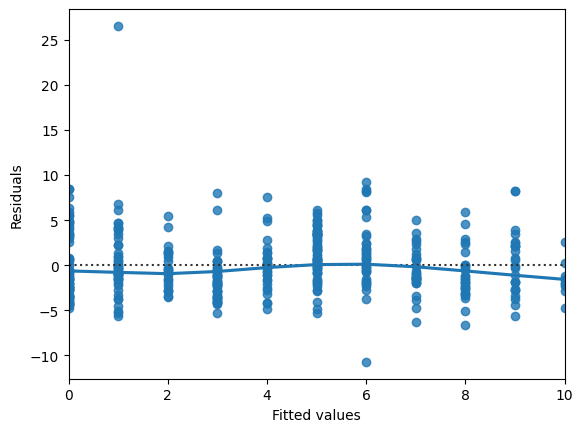

In [269]:
# Plot the residuals vs. fitted values
sns.residplot(x="n_convenience", y="price_twd_msq", data=re_df, lowess = True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

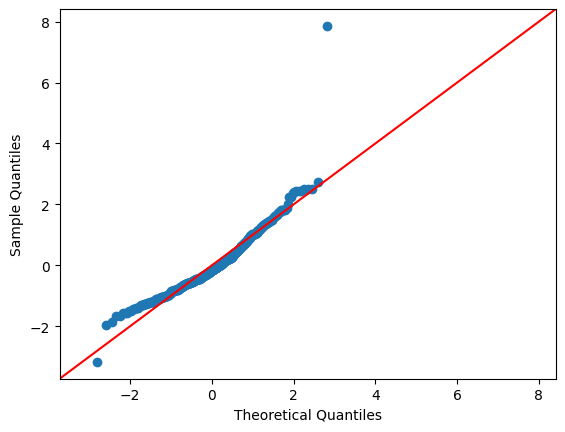

In [270]:
# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

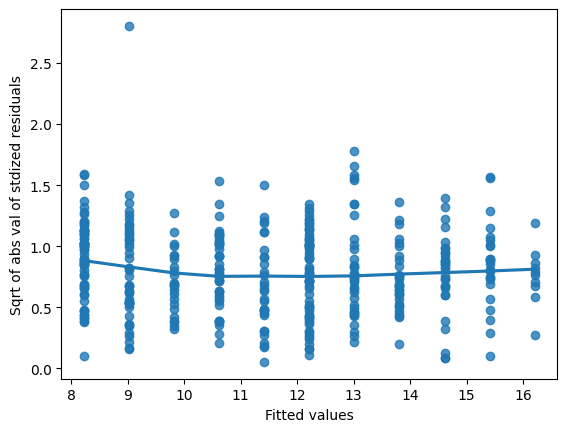

In [271]:
# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

## Outliers, leverage, and influence


In [272]:
roach = fish_df[fish_df["species"]== "Roach"]
roach.head()

,species,mass_g,length_cm
35,Roach,40.0,12.9
36,Roach,69.0,16.5
37,Roach,78.0,17.5
38,Roach,87.0,18.2
39,Roach,120.0,18.6


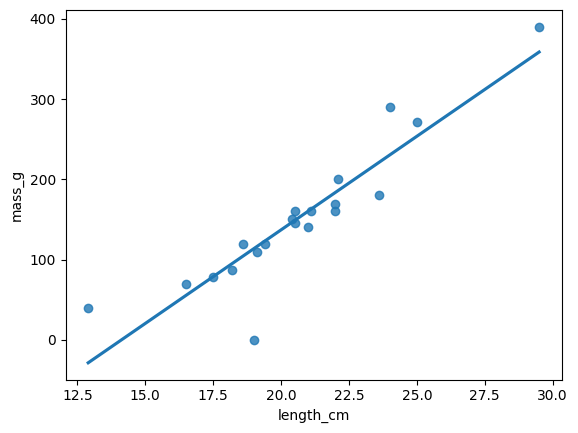

In [273]:
sns.regplot(x = "length_cm", y = "mass_g", data = roach, ci = None)
plt.show()

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_31575/988479150.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roach["extreme_l"] = ((roach['length_cm'] < 15) | (roach['length_cm'] >26))


<Axes: xlabel='length_cm', ylabel='mass_g'>

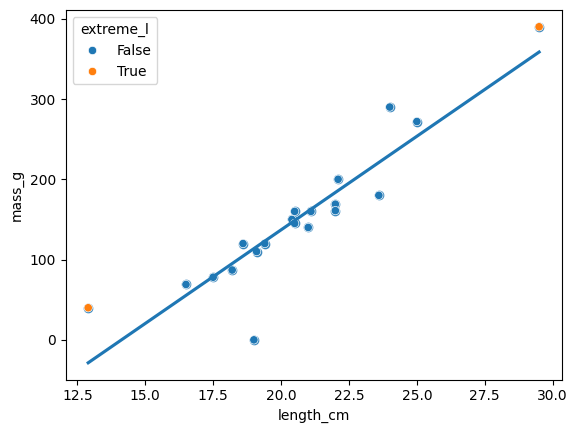

In [274]:
#The technical term for an unusual data point is an outlier.
#The first kind of outlier is when you have explanatory variables that are extreme. 
#In the simple linear regression case, it's easy to find and visualize them. 

roach["extreme_l"] = ((roach['length_cm'] < 15) | (roach['length_cm'] >26))

fig = plt.figure()
sns.regplot(x = "length_cm", y = "mass_g", data = roach, ci = None)

sns.scatterplot(x = "length_cm", y = "mass_g", data = roach, hue = "extreme_l")



/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_31575/4177655882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roach['extreme_m'] = roach['mass_g'] < 1


<Axes: xlabel='length_cm', ylabel='mass_g'>

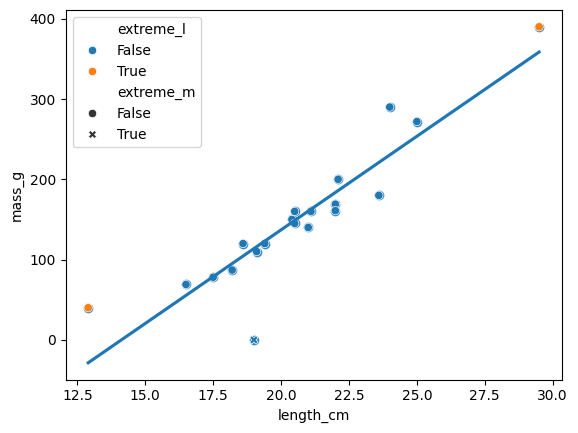

In [275]:
#The other property of outliers is when the point lies a long way from the model predictions.

roach['extreme_m'] = roach['mass_g'] < 1

fig = plt.figure()
sns.regplot(x = "length_cm", y = "mass_g", data = roach, ci = None)

sns.scatterplot(x = "length_cm", y = "mass_g", data = roach, hue = "extreme_l", style = 'extreme_m')



In [276]:
#Leverage quantifies how extreme your explanatory variable values are. That is, it measures extreme outliers
#A related concept to leverage is influence. 
#This is a type of "leave one out" metric. That is, it measures how much the model would change if you reran it without that data point. 

mdl_roach = ols("mass_g ~ length_cm", data = roach).fit()
summary_roach = mdl_roach.get_influence().summary_frame()

#For historical reasons, leverage is described in the so-called hat matrix. 
roach['leverage'] = summary_roach['hat_diag']

roach.head()

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_31575/4142199493.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roach['leverage'] = summary_roach['hat_diag']


,species,mass_g,length_cm,extreme_l,extreme_m,leverage
35,Roach,40.0,12.9,True,False,0.313729
36,Roach,69.0,16.5,False,False,0.125538
37,Roach,78.0,17.5,False,False,0.093487
38,Roach,87.0,18.2,False,False,0.076283
39,Roach,120.0,18.6,False,False,0.068387


In [277]:
#Cook's distance is the most common measure of influence
roach['cooks_dist'] = summary_roach['cooks_d']
roach.head()

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_31575/3824135079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roach['cooks_dist'] = summary_roach['cooks_d']


,species,mass_g,length_cm,extreme_l,extreme_m,leverage,cooks_dist
35,Roach,40.0,12.9,True,False,0.313729,1.074015
36,Roach,69.0,16.5,False,False,0.125538,0.010429
37,Roach,78.0,17.5,False,False,0.093487,0.000020
38,Roach,87.0,18.2,False,False,0.076283,0.001980
39,Roach,120.0,18.6,False,False,0.068387,0.006610


In [278]:
#find the most influential point by arranging the rows by descending Cook's distance values. 
roach.sort_values("cooks_dist", ascending = False)

,species,mass_g,length_cm,extreme_l,extreme_m,leverage,cooks_dist
35,Roach,40.0,12.9,True,False,0.313729,1.074015
54,Roach,390.0,29.5,True,False,0.394740,0.365782
40,Roach,0.0,19.0,False,True,0.061897,0.311852
52,Roach,290.0,24.0,False,False,0.099488,0.150064
51,Roach,180.0,23.6,False,False,0.088391,0.061209
53,Roach,272.0,25.0,False,False,0.133386,0.020615
49,Roach,161.0,22.0,False,False,0.058072,0.011516
36,Roach,69.0,16.5,False,False,0.125538,0.010429
46,Roach,140.0,21.0,False,False,0.050554,0.007950
39,Roach,120.0,18.6,False,False,0.068387,0.006610


<Axes: xlabel='length_cm', ylabel='mass_g'>

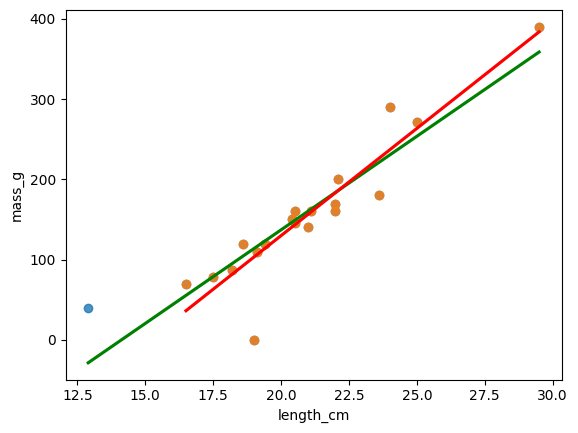

In [279]:
#removing the most influencial point
roach_not_short = roach[roach['length_cm'] != 12.9]

fig = plt.figure()
sns.regplot(x = "length_cm", y = "mass_g", data = roach, ci = None, line_kws = {'color': 'green'})
sns.regplot(x = "length_cm", y = "mass_g", data = roach_not_short, ci = None, line_kws = {'color': 'red'})

# The slope of the line has completely changed just by having one less data point.


## Exercise

In [294]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
re_df["leverage"] = summary_info['hat_diag']

# Sort taiwan_real_estate by leverage in descending order and print the head
print(re_df.sort_values('leverage',ascending = False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
347       6488.021              1        15 to 30       3.388805   
116       6396.283              1        30 to 45       3.691377   
249       6306.153              1        15 to 30       4.538578   
255       5512.038              1        30 to 45       5.264750   
8         5512.038              1        30 to 45       5.688351   

     sqrt_dist_to_mrt_m  leverage  cooks_dist  
347           80.548253  0.026665    0.003508  
116           79.976765  0.026135    0.004470  
249           79.411290  0.025617    0.009373  
255           74.243101  0.021142    0.006304  
8             74.243101  0.021142    0.009060  


In [295]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
re_df["leverage"] = summary_info["hat_diag"]

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
re_df["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(re_df.sort_values("cooks_dist", ascending = False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
270       252.5822              1         0 to 15      35.552194   
148      3780.5900              0        15 to 30      13.645991   
228      3171.3290              0         0 to 15      14.099849   
220       186.5101              9        30 to 45      23.691377   
113       393.2606              6         0 to 15       2.299546   

     sqrt_dist_to_mrt_m  leverage  cooks_dist  
270           15.892835  0.003849    0.115549  
148           61.486503  0.012147    0.052440  
228           56.314554  0.009332    0.035384  
220           13.656870  0.004401    0.025123  
113           19.830799  0.003095    0.022813  


In [296]:
bank_df = pd.read_csv('/Users/priyachaudhuri/Desktop/SSB TERM 1/Artificial intelligence/churn.csv')
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   has_churned                400 non-null    int64  
 1   time_since_first_purchase  400 non-null    float64
 2   time_since_last_purchase   400 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


## Logistic Regression

In [306]:
#linear model on churn vs recency
mdl_churn_vs_recent_lm = ols("has_churned ~ time_since_last_purchase", data = bank_df).fit()
print(mdl_churn_vs_recent_lm.params)

Intercept                   0.490780
time_since_last_purchase    0.063783
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

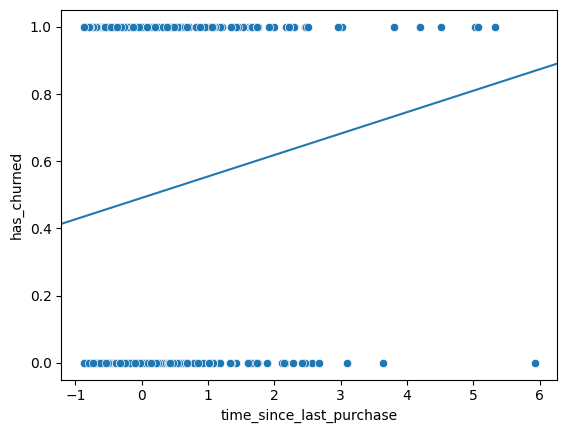

In [307]:
intercept, slope = mdl_churn_vs_recent_lm.params
sns.scatterplot(x ="time_since_last_purchase", y ="has_churned", data = bank_df)
#used plt dot axline rather than sns dot regplot so the line isn't limited to the extent of the data. 
plt.axline(xy1=(0,intercept), slope = slope)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

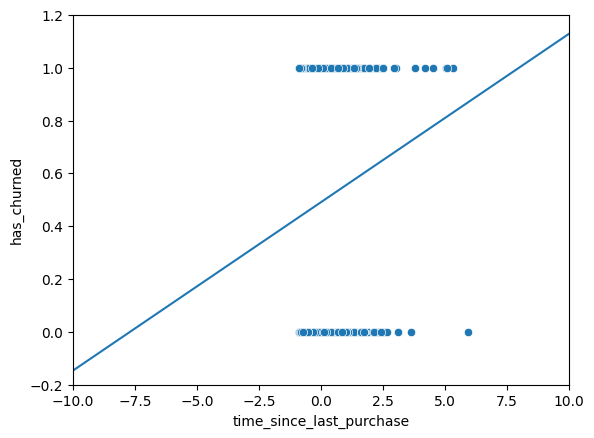

In [308]:
#Zooming out by setting axis limits with xlim and ylim shows the problem with using a linear model.
sns.scatterplot(x ="time_since_last_purchase", y ="has_churned", data = bank_df)
plt.axline(xy1=(0,intercept), slope = slope)
plt.xlim(-10,10)
plt.ylim(-0.2,1.2)
plt.show

#In the bottom-left of the plot, the model predicts negative probabilities. 
#In the top-right, the model predicts probabilities greater than one. Both situations are impossible.

In [309]:
#logistic model on churn vs recency
mdl_churn_vs_recent_logit = logit("has_churned ~ time_since_last_purchase", data = bank_df).fit()
print(mdl_churn_vs_recent_logit.params)

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4
Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64


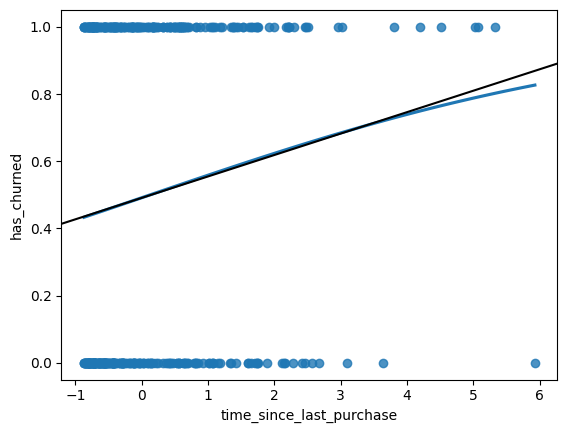

In [313]:
sns.regplot(x = "time_since_last_purchase", y = "has_churned",
            data = bank_df, ci = None, logistic = True)
plt.axline(xy1=(0,intercept), slope = slope, color = "black")
plt.show()


## Exercise

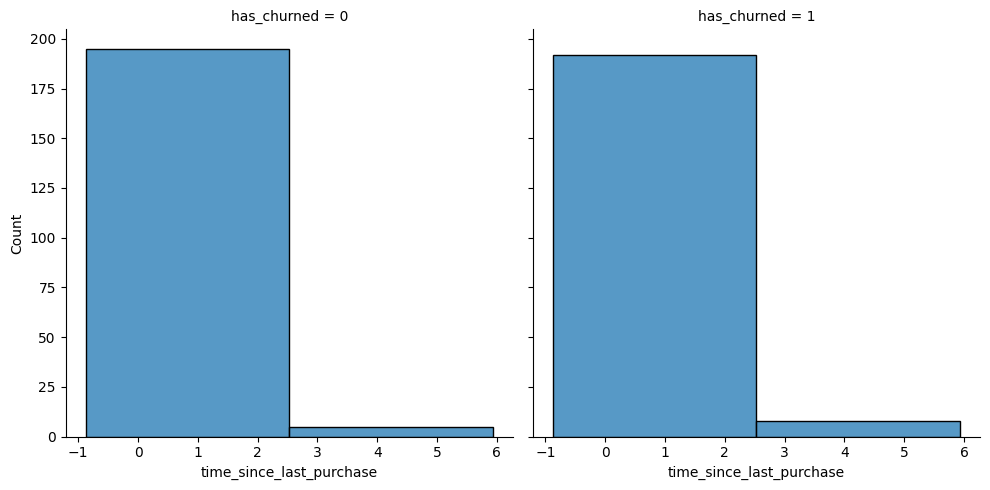

In [321]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(data = bank_df, x ="time_since_last_purchase", col = "has_churned" , bins = 2)
plt.show()

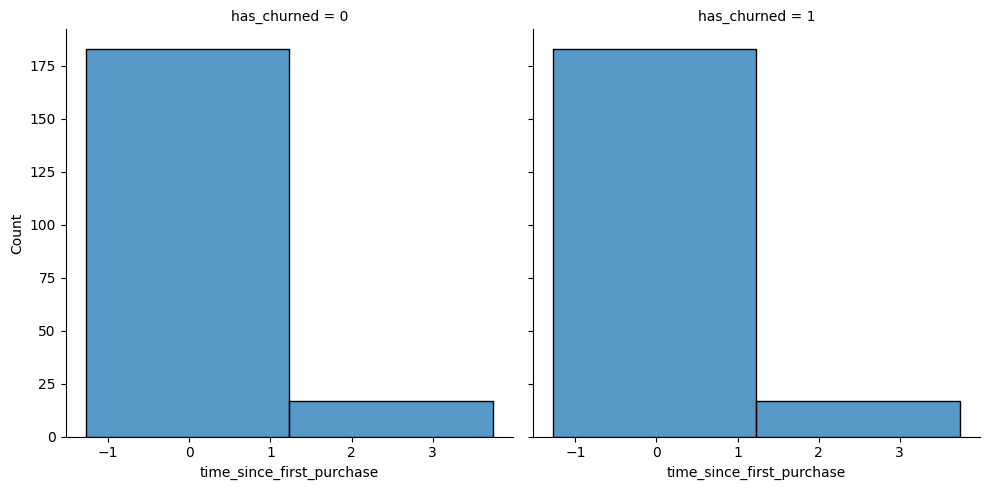

In [322]:
# Redraw the plot with time_since_first_purchase
sns.displot(data = bank_df, x ="time_since_first_purchase", col = "has_churned" , bins = 2)

plt.show()

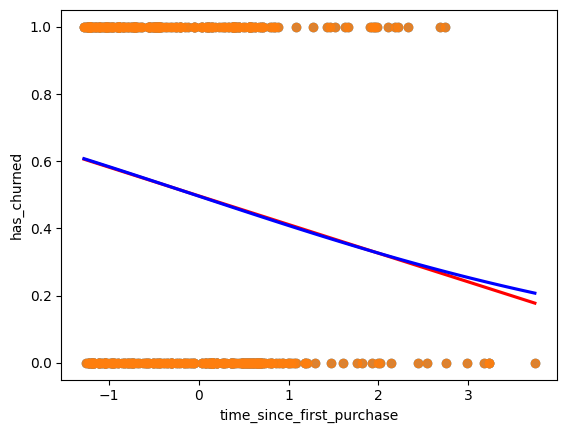

In [324]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=bank_df, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=bank_df, 
            ci=None,
            line_kws={"color": "blue"},
            logistic = True)

plt.show()

In [339]:
# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit("has_churned ~ time_since_first_purchase", data = bank_df).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


## Predictions using Logistic model


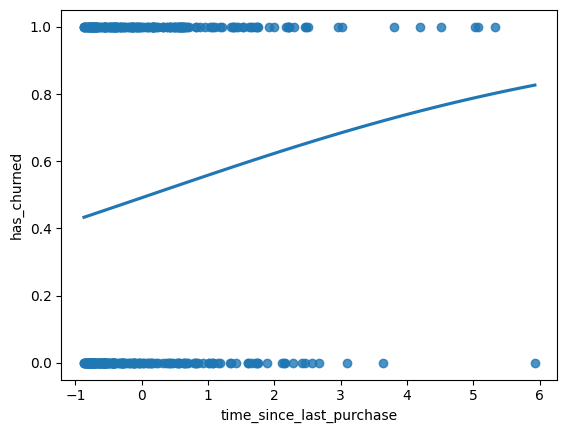

In [327]:
sns.regplot(x="time_since_last_purchase",
            y="has_churned",
            data=bank_df, 
            ci=None,
            logistic = True)
plt.show()

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


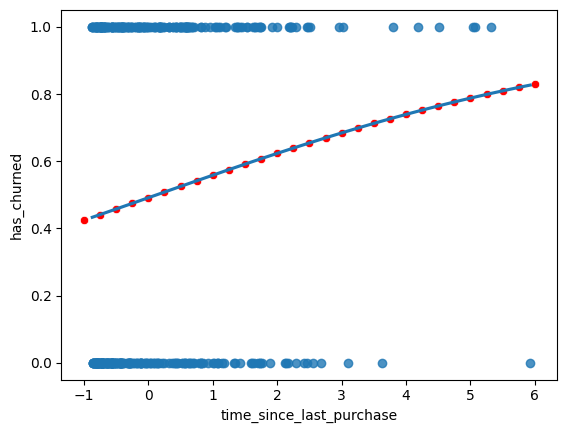

In [329]:
mdl_recency = logit("has_churned ~ time_since_last_purchase", data = bank_df).fit()
explanatory_data = pd.DataFrame({'time_since_last_purchase': np.arange(-1,6.25,0.25)})
prediction_data = explanatory_data.assign(has_churned = mdl_recency.predict(explanatory_data))
sns.regplot(x="time_since_last_purchase",
            y="has_churned",
            data=bank_df, 
            ci=None,
            logistic = True)
sns.scatterplot(x="time_since_last_purchase",
            y="has_churned",
            data=prediction_data, 
            color = "red")
plt.show()

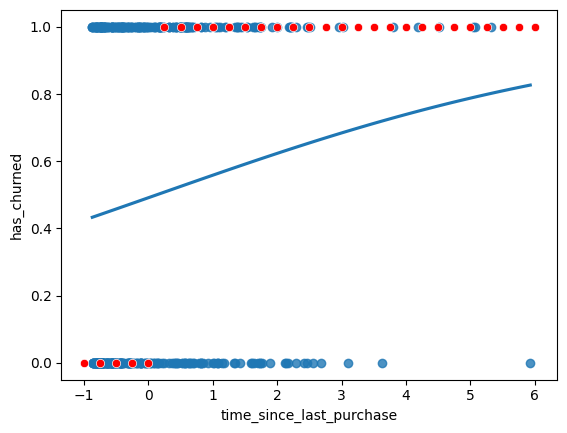

In [332]:
prediction_data['most_likely_outcome']= np.round(prediction_data['has_churned'])

sns.regplot(x="time_since_last_purchase",
            y="has_churned",
            data=bank_df, 
            ci=None,
            logistic = True)
sns.scatterplot(x="time_since_last_purchase",
            y="most_likely_outcome",
            data=prediction_data, 
            color = "red")
plt.show()

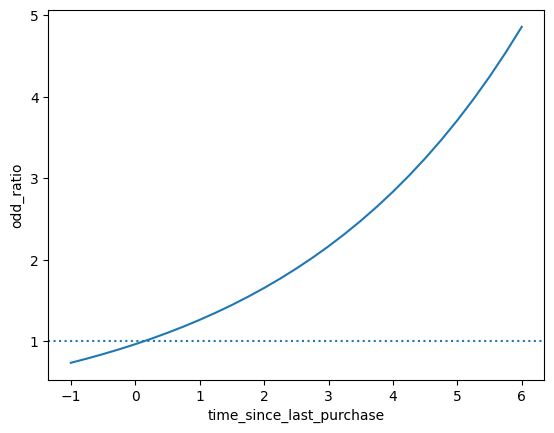

In [334]:
#odds ratio = probability that something happens/probability that it doesn't
prediction_data['odd_ratio'] = prediction_data["has_churned"]/(1-prediction_data["has_churned"])

sns.lineplot(x = "time_since_last_purchase", y = "odd_ratio", data = prediction_data)

#the dotted line where the odds ratio is one indicates where churning is just as likely as not churning. 
plt.axhline(y = 1, linestyle = "dotted")
plt.show()

#In the bottom-left, the predictions are below one, so the chance of churning is less than the chance of not churning. 
#In the top-right, the chance of churning is about five times more than the chance of not churning.

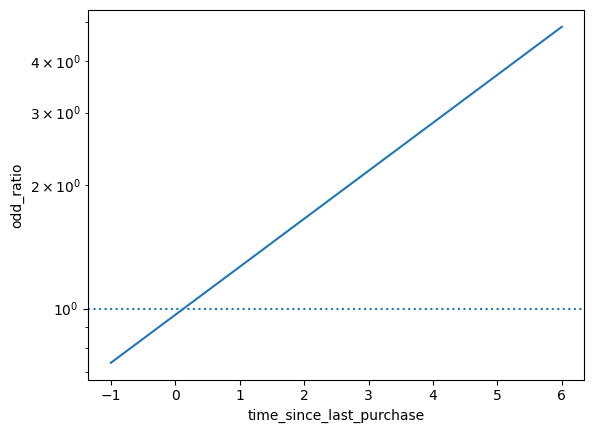

In [335]:
sns.lineplot(x = "time_since_last_purchase", y = "odd_ratio", data = prediction_data)
plt.axhline(y = 1, linestyle = "dotted")
plt.yscale("log")
plt.show()

#This plot adds a logarithmic y scale.

In [337]:
#log-odds ratio is another common way of describing logistic regression predictions. 
#log-odds ratio is also known as the logit - the name of the function being used to model logistic regression.
prediction_data['log_odd_ratio'] = np.log(prediction_data["odd_ratio"])
prediction_data.head()



,time_since_last_purchase,has_churned,most_likely_outcome,odd_ratio,log_odd_ratio
0,-1.00,0.424523,0.0,0.737688,-0.304234
1,-0.75,0.441043,0.0,0.789046,-0.236931
2,-0.50,0.457695,0.0,0.843980,-0.169627
3,-0.25,0.474441,0.0,0.902738,-0.102323
4,0.00,0.491246,0.0,0.965587,-0.035019


In [ ]:
#Scale                   | easy to interpret | changes easy to interpret | precise?
#----------------------------------------------------------------------------------------
#Probability             | Yes               | Yes                       | Yes
#Most likely outcome     | YES               | Yes                       | No
#Odd ratios              | Yes               | No                        | Yes
#Log odd ratios          | No                | Yes                       | Yes

## Exercise

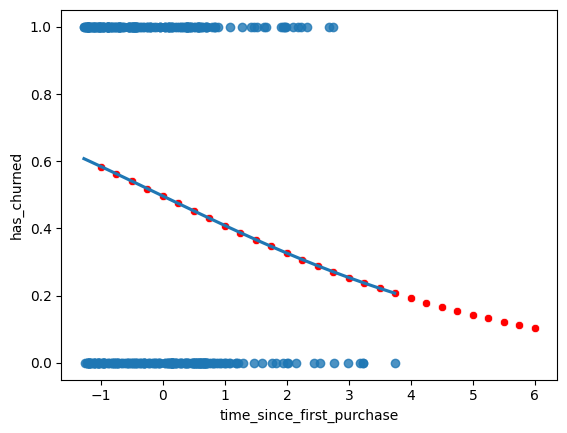

In [341]:
# Create prediction_data
explanatory_data = pd.DataFrame({'time_since_first_purchase': np.arange(-1,6.25,0.25)})
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(x = "time_since_first_purchase",
y = "has_churned",
data = bank_df, ci = None,
logistic = True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",
            y="has_churned",
            data=prediction_data, 
            color = "red")

plt.show()

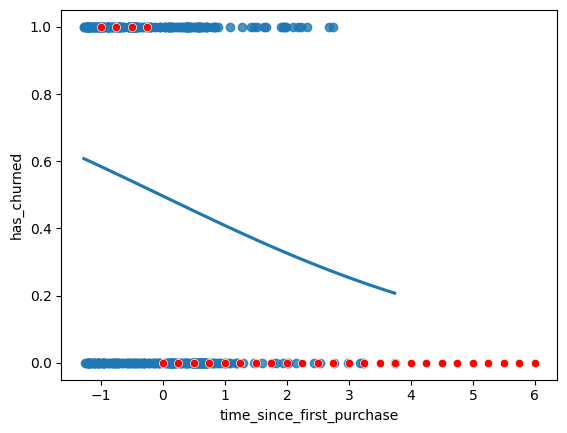

In [343]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=bank_df,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",
            y="most_likely_outcome",
            data=prediction_data, 
            color = "red")

plt.show()

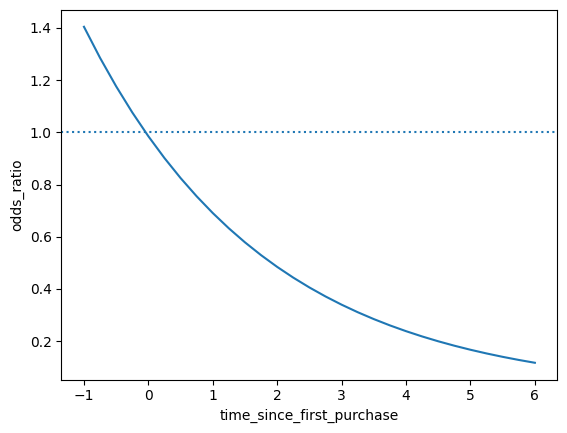

In [344]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x = "time_since_first_purchase", y = "odds_ratio", data = prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

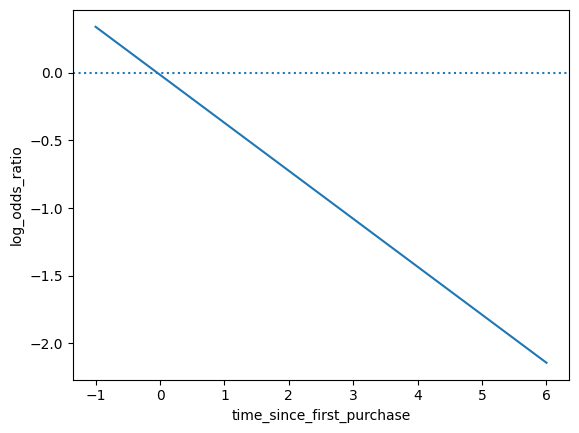

In [345]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

## Quantifying logistic regression fit


In [348]:
actual_response = bank_df["has_churned"]
#predict method on the fitted logistic regression model --> the predicted values of each observation in the dataset. 
#These predicted values are probabilities. To get the most likely outcome, we need to round the values to zero or one. 
predicted_response = np.round(mdl_recency.predict())
outcomes = pd.DataFrame({"actual_response": actual_response,
                        "predicted_response":predicted_response })
print(outcomes.value_counts(sort = False))


actual_response  predicted_response
0                0.0                   141
                 1.0                    59
1                0.0                   111
                 1.0                    89
Name: count, dtype: int64


In [349]:
#The confusion matrix can also be created automatically with the pred_table method.
conf_matrix = mdl_recency.pred_table()
print(conf_matrix)

#TrueNeg |FalsePos 
#--------|--------
#FalseNeg|TruePos               


[[141.  59.]
 [111.  89.]]


(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.49751243781094534, 0.70265780730897),
  ('0', '1'): (0.0,
   0.7059800664451826,
   0.49751243781094534,
   0.2940199335548173),
  ('1', '0'): (0.5024875621890548,
   0.0,
   0.49751243781094534,
   0.553156146179402),
  ('1', '1'): (0.5024875621890548,
   0.5564784053156145,
   0.49751243781094534,
   0.4435215946843853)})

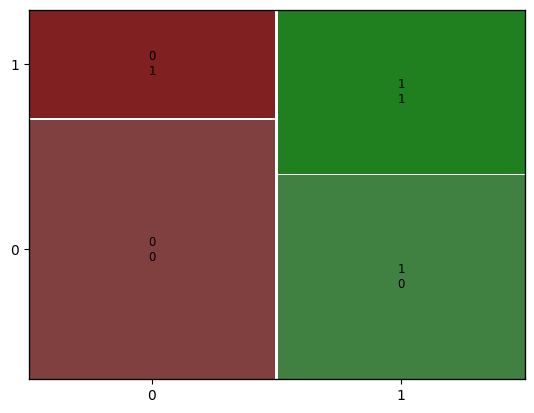

In [351]:
mosaic(conf_matrix)

#The width of each column is proportional to the fraction of observations in each category of actual values. 
#Here, there are 200 actual churns and 200 actual not churns, so each column has the same width. 

In [352]:
#Accurancy is the proportion of correct predictions
#Accuracy = (TN+TP)/(TN+FN+TP+FP)
#proportion of customers where the model correctly predicted whether they churned or not
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

acc = (TN+TP)/(TN+FN+TP+FP)
print(acc)

0.575


In [353]:
#Sensitivity is the proportion of True Positives
#Sensitivity = TP/(FN+TP)
#proportion of customer who churned where the model correctly predicted that they churned
sens = TP/(FN+TP)
print(sens)

0.445


In [355]:
#Specificity is the proportion of True Negatives
#Specificity = TN / (FP+TN)
#proportion of customers who didnt churn where the model correctly predicted  that they didnt churn
#improving specificity will decrease sensitivity
#increasing sensitivity will decrease specificity.
spec = TN / (FP+TN)
print(spec)


0.705


## Exercise


In [357]:
# Get the actual responses
actual_response = bank_df["has_churned"]

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response": actual_response,
                        "predicted_response":predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
Name: count, dtype: int64


[[112.  88.]
 [ 76. 124.]]


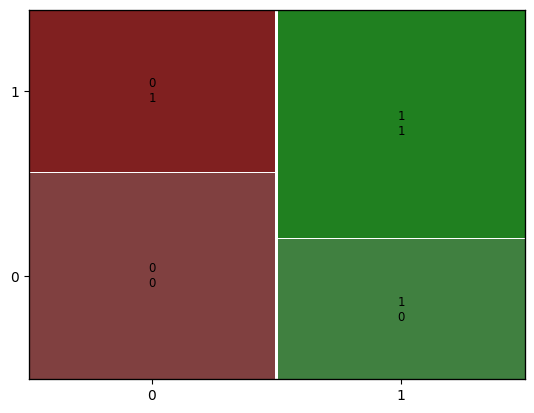

In [358]:
# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()